In [1]:
import numpy as np
import matplotlib
# matplotlib.rcParams['figure.figsize']=(4,3)
# %matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import GPy

In [2]:
# Import datasets as pandas
# from scipy.io import loadmat
import pandas as pd
# data_set = loadmat("Mark_4sec_CA1PSD_ISO_freqamp_020619.mat")
CA1_df = pd.read_csv("Mark_4sec_CA1PSD_ISO_freqamp_020619.csv")
CA1_df

,Stim_1,Stim_2,Xk0_1,Xk0_2,Xk0_3,Xk0_4,Xk0_5,Xk0_6,Xk0_7,Xk0_8,...,Xk1_91,Xk1_92,Xk1_93,Xk1_94,Xk1_95,Xk1_96,Xk1_97,Xk1_98,Xk1_99,Xk1_100
0,17,30,2.889382e-08,8.228355e-10,3.727805e-10,4.241217e-10,3.835249e-10,1.359495e-10,7.646542e-11,7.230198e-11,...,1.905511e-13,1.772096e-13,2.540316e-13,9.875528e-14,1.503621e-13,1.187669e-13,1.973010e-13,2.227980e-13,1.840703e-13,7.943871e-14
1,42,40,2.946870e-08,2.651098e-10,1.178408e-10,4.392692e-11,4.694084e-11,3.303667e-11,3.519227e-11,3.981263e-11,...,2.301898e-13,2.226828e-13,1.844381e-13,9.489514e-14,1.303267e-13,1.672190e-13,1.932164e-13,2.093461e-13,2.772425e-13,1.951049e-13
2,35,30,3.033540e-08,9.903383e-10,8.237377e-10,5.810566e-10,2.946790e-10,1.872337e-10,1.528366e-10,1.426708e-10,...,1.941317e-13,3.253641e-13,3.292398e-13,1.838587e-13,3.118819e-13,3.222774e-13,2.982563e-13,3.113566e-13,2.968086e-13,1.379729e-13
3,23,50,2.800316e-08,1.405249e-10,7.744954e-11,5.042274e-11,7.967258e-11,7.972625e-11,5.209429e-11,5.965894e-11,...,2.920034e-13,4.410565e-13,6.254435e-13,4.197941e-13,1.453352e-13,2.077807e-13,1.711589e-13,1.964532e-13,3.274727e-13,4.111102e-13
4,42,50,2.951470e-08,9.158716e-10,1.002492e-09,3.851373e-10,1.190141e-10,1.593892e-10,3.091918e-10,1.785465e-10,...,1.522438e-13,1.251475e-13,1.250717e-13,2.574372e-13,2.072287e-13,1.887576e-13,3.401650e-13,2.548371e-13,2.752148e-13,2.036985e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,29,40,2.760391e-08,5.482257e-10,4.152814e-10,3.823512e-10,1.394368e-10,1.306009e-10,3.228872e-10,1.929548e-10,...,1.365177e-13,9.045459e-14,6.317431e-14,1.000605e-13,1.658208e-13,1.455544e-13,1.089338e-13,1.157295e-13,9.619555e-14,9.370679e-14
380,17,50,2.813580e-08,4.598266e-10,3.300581e-10,4.083492e-10,2.354260e-10,1.694233e-10,1.117590e-10,1.376190e-10,...,1.105672e-13,7.664209e-14,7.384185e-14,1.100898e-13,1.351685e-13,5.693625e-14,1.141458e-13,1.047674e-13,9.196161e-14,8.495494e-14
381,42,30,2.869622e-08,7.607811e-10,4.008928e-10,4.830553e-10,4.074416e-10,5.000619e-10,2.710350e-10,1.332286e-10,...,1.723231e-13,1.253901e-13,1.535894e-13,1.723239e-13,1.382617e-13,1.725417e-13,1.785419e-13,1.846773e-13,1.525604e-13,1.311332e-13
382,7,50,2.768996e-08,4.727119e-10,2.493700e-10,3.049506e-10,3.469474e-10,3.886375e-10,1.488559e-10,1.052257e-10,...,9.520196e-14,6.715345e-14,7.916543e-14,1.259009e-13,2.051121e-13,8.416903e-14,7.020470e-14,5.951097e-14,8.133673e-14,7.944941e-14


In [3]:
CA1_df.describe()

,Stim_1,Stim_2,Xk0_1,Xk0_2,Xk0_3,Xk0_4,Xk0_5,Xk0_6,Xk0_7,Xk0_8,...,Xk1_91,Xk1_92,Xk1_93,Xk1_94,Xk1_95,Xk1_96,Xk1_97,Xk1_98,Xk1_99,Xk1_100
count,384.000000,384.000000,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,...,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02
mean,21.125000,25.000000,3.006580e-08,6.838802e-10,4.242416e-10,3.325875e-10,2.737854e-10,2.119977e-10,1.660316e-10,1.318236e-10,...,1.642277e-13,1.551898e-13,1.429085e-13,1.437353e-13,1.391482e-13,1.285422e-13,1.252911e-13,1.292104e-13,1.296236e-13,1.204573e-13
std,12.630313,17.100532,2.614463e-08,5.566612e-10,3.014916e-10,2.396455e-10,1.939794e-10,1.458412e-10,1.156664e-10,8.830746e-11,...,1.178856e-13,1.098695e-13,1.121640e-13,9.989423e-14,1.039656e-13,1.127923e-13,1.026353e-13,1.016668e-13,1.050891e-13,9.597760e-14
min,5.000000,0.000000,2.587095e-08,9.917649e-11,4.360904e-11,2.944649e-11,1.911013e-11,1.608183e-11,1.073114e-11,7.456511e-12,...,4.412311e-14,3.014739e-14,2.504564e-14,2.505650e-14,1.791496e-14,2.179438e-14,3.120023e-14,3.205342e-14,3.444288e-14,3.533534e-14
25%,10.000000,10.000000,2.713823e-08,3.064636e-10,1.851726e-10,1.350993e-10,1.055163e-10,8.852281e-11,7.113036e-11,6.074769e-11,...,1.029310e-13,9.272843e-14,8.290598e-14,8.736139e-14,9.155886e-14,7.631374e-14,7.626764e-14,7.942759e-14,8.286357e-14,7.894606e-14
50%,20.000000,25.000000,2.772918e-08,6.142604e-10,3.925562e-10,3.029925e-10,2.435663e-10,1.945367e-10,1.456843e-10,1.262569e-10,...,1.478822e-13,1.376601e-13,1.210754e-13,1.251736e-13,1.260593e-13,1.114552e-13,1.079610e-13,1.143833e-13,1.149826e-13,1.006343e-13
75%,30.500000,40.000000,2.839150e-08,9.265502e-10,5.722245e-10,4.831342e-10,3.899357e-10,2.962307e-10,2.396378e-10,1.819960e-10,...,1.986908e-13,1.872604e-13,1.775699e-13,1.710130e-13,1.663452e-13,1.591248e-13,1.529868e-13,1.555532e-13,1.565489e-13,1.446464e-13
max,42.000000,50.000000,5.088916e-07,6.131808e-09,2.154967e-09,1.463382e-09,9.948709e-10,7.954313e-10,5.683271e-10,4.922672e-10,...,1.937020e-12,1.596251e-12,1.671863e-12,1.472966e-12,1.758082e-12,1.970697e-12,1.765635e-12,1.732637e-12,1.848186e-12,1.656409e-12


In [12]:
np.r_[0:2, 32:52]

array([ 0,  1, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51])

In [14]:
# gamma = np.arange(32,51)
# print(gamma)
print(CA1_df.iloc[1, np.r_[0:2, 33:52]])

Stim_1    4.200000e+01
Stim_2    4.000000e+01
Xk0_32    2.112203e-12
Xk0_33    2.231561e-12
Xk0_34    2.328413e-12
Xk0_35    2.455828e-12
Xk0_36    2.497908e-12
Xk0_37    2.751822e-12
Xk0_38    1.657174e-12
Xk0_39    2.179901e-12
Xk0_40    2.035592e-12
Xk0_41    2.451155e-12
Xk0_42    1.282769e-12
Xk0_43    1.103471e-12
Xk0_44    6.386534e-13
Xk0_45    8.305596e-13
Xk0_46    4.755962e-13
Xk0_47    5.344474e-13
Xk0_48    4.361463e-13
Xk0_49    3.455111e-13
Xk0_50    5.053524e-13
Name: 1, dtype: float64


# Select the gamma freq. stimulations

CA1_df_gamma = CA1_df[CA1_df['Stim_1']>32]
CA1_df_gamma

In [15]:
# calculate mean psd for Xk0 and Xk1
# _, Y = CA1_df_gamma.iloc[:, 2:].mean(axis=1)
# select Kx1_32:50 are column? 
Y = np.mean(CA1_df.iloc[:, 133:152],axis=1)
print(np.shape(Y))
# Y.reset_index(drop=True, inplace=True)
Y_reshape =Y[:, np.newaxis]
print(Y)

(384,)
0      1.787256e-11
1      2.446021e-11
2      2.001850e-11
3      1.296795e-11
4      1.972900e-11
           ...     
379    9.146226e-12
380    7.698385e-12
381    1.234971e-11
382    3.898356e-12
383    9.337085e-12
Length: 384, dtype: float64


 C:\Users\sinad\AppData\Local\Temp\ipykernel_5404\865466885.py:7: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [17]:
X = CA1_df.iloc[:,  np.r_[0:2, 33:52]]
X

,Stim_1,Stim_2,Xk0_32,Xk0_33,Xk0_34,Xk0_35,Xk0_36,Xk0_37,Xk0_38,Xk0_39,...,Xk0_41,Xk0_42,Xk0_43,Xk0_44,Xk0_45,Xk0_46,Xk0_47,Xk0_48,Xk0_49,Xk0_50
0,17,30,7.647591e-12,9.988139e-12,9.736423e-12,7.794826e-12,4.366551e-12,8.924709e-12,9.031150e-12,6.014647e-12,...,3.181360e-12,4.318962e-12,2.867546e-12,1.232155e-12,1.343819e-12,1.098758e-12,7.046532e-13,7.664787e-13,1.448859e-12,9.205041e-13
1,42,40,2.112203e-12,2.231561e-12,2.328413e-12,2.455828e-12,2.497908e-12,2.751822e-12,1.657174e-12,2.179901e-12,...,2.451155e-12,1.282769e-12,1.103471e-12,6.386534e-13,8.305596e-13,4.755962e-13,5.344474e-13,4.361463e-13,3.455111e-13,5.053524e-13
2,35,30,4.319000e-12,5.045057e-12,2.053744e-12,4.258347e-12,3.828160e-12,3.781325e-12,2.249639e-12,2.156366e-12,...,2.602173e-12,1.369954e-12,2.133362e-12,2.631854e-12,2.632125e-12,2.267939e-12,1.111208e-12,1.084008e-12,1.528173e-12,1.378724e-12
3,23,50,5.234307e-12,2.412883e-12,1.404828e-12,2.686714e-12,4.083278e-12,3.246953e-12,1.480787e-12,1.402109e-12,...,3.654412e-12,3.094348e-12,2.481740e-12,1.143075e-12,7.424389e-13,1.462360e-12,1.217460e-12,7.122456e-13,9.870058e-13,1.089327e-12
4,42,50,9.684767e-12,8.263891e-12,4.445607e-12,4.078694e-12,9.629061e-12,1.129185e-11,2.712717e-12,2.235706e-12,...,4.030332e-12,2.308308e-12,2.405872e-12,3.048704e-12,1.751599e-12,7.934596e-13,2.808474e-12,2.532897e-12,1.252426e-12,1.709700e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,29,40,1.963641e-12,1.567379e-12,2.354817e-12,2.399056e-12,2.963261e-12,1.476431e-12,9.391980e-13,1.384443e-12,...,6.372265e-13,2.941441e-13,2.507888e-13,6.019513e-13,7.261185e-13,5.001156e-13,6.480514e-13,7.027642e-13,6.601360e-13,4.745592e-13
380,17,50,4.912779e-12,2.108367e-12,1.333320e-12,1.231522e-12,1.122581e-12,2.006474e-12,1.554526e-12,1.339027e-12,...,6.922546e-13,7.875830e-13,8.659567e-13,1.133226e-12,1.626084e-12,1.563356e-12,9.121384e-13,4.645965e-13,4.156854e-13,5.148075e-13
381,42,30,6.089433e-12,3.314316e-12,3.853112e-12,3.006731e-12,1.962899e-12,2.179915e-12,1.896692e-12,1.316443e-12,...,1.269307e-12,1.874922e-12,2.096921e-12,1.537882e-12,1.297049e-12,1.237742e-12,2.072397e-12,1.946591e-12,8.358102e-13,7.968552e-13
382,7,50,2.215332e-12,3.108612e-12,3.944342e-12,1.550040e-12,1.516170e-12,1.192070e-12,1.302153e-12,1.575815e-12,...,1.367639e-12,9.755497e-13,1.140708e-12,8.506757e-13,1.085965e-12,7.429715e-13,5.614280e-13,5.275290e-13,4.455558e-13,2.989108e-13


X.reset_index(drop=True, inplace=True)
X

In [18]:
# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

In [19]:
# create simple GP model
m = GPy.models.GPRegression(X,Y_reshape,ker)
display(m)

 C:\Users\sinad\anaconda3\envs\NeuroGaussianProcess\lib\site-packages\GPy\core\gp.py:85: UserWarning:Your kernel has a different input dimension 2 then the given X dimension 21. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel


GP_regression.,value,constraints,priors
sum.Mat52.variance,1.0,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


 C:\Users\sinad\anaconda3\envs\NeuroGaussianProcess\lib\site-packages\GPy\plotting\matplot_dep\plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


GP_regression.,value,constraints,priors
sum.Mat52.variance,4.029323481129019e-18,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,7.896980021048358e-29,+ve,
Gaussian_noise.variance,7.896980021048358e-29,+ve,


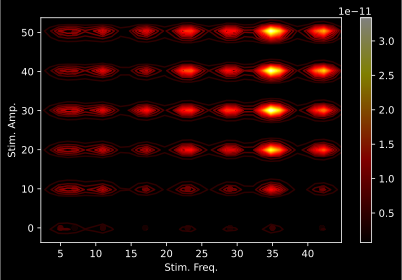

In [41]:
# matplotlib.use("Agg")
GPy.plotting.change_plotting_library("matplotlib")
# GPy.plotting.change_plotting_library('plotly')
fig1 = m.plot(visible_dims=[0,1],legend=False, xlabel='Stim. Freq.', ylabel='Stim. Amp.',
              label="Mark_4sec_CA1PSD_ISO_freqamp_020619");
display(m);
ax = plt.gca()
PCM = ax.get_children()[0]
plt.colorbar(PCM, ax=ax)

In [42]:
# matplotlib.use("Agg")
GPy.plotting.change_plotting_library("matplotlib")
display(fig1)

{'dataplot': [<matplotlib.collections.PathCollection at 0x16bfb9e1610>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x16bfb9e1910>]}

In [22]:
# optimize and plot
m.optimize(messages=True,max_f_eval = 1000);

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s35  0007  -3.183898e+03   5.985035e-15 
Runtime:     00s35
Optimization status: Converged



GP_regression.,value,constraints,priors
sum.Mat52.variance,4.029323481129019e-18,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,7.896980021048358e-29,+ve,
Gaussian_noise.variance,7.896980021048358e-29,+ve,


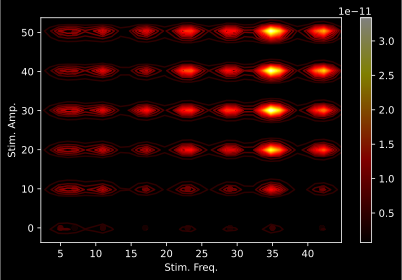

In [43]:
figure = m.plot(visible_dims=[0,1], legend=False, xlabel='Stim. Freq.' , ylabel='Stim. Amp.');
# display(GPy.plotting.show(figure, filename='basic_gp_regression_notebook_2d'))
display(m)
ax = plt.gca()
PCM = ax.get_children()[0]
plt.colorbar(PCM, ax=ax)
